# Salary Prediction using Bagging and Boosting


### Data description
The business meaning of each column in the data is as below

* age: Age of the employee
* workclass: Which type of organization the employee works in? State-gov/Private etc.
* fnlwgt: final weight, which is the number of units in the target population that the responding unit represents
* education: The highest education of the employee
* education_num: numeric code for the highest education of the employee
* marital_status: The marital status of the employee
* occupation: The type of job
* relationship: Type of relationship in? Husband, wife etc.
* race: Which race the employee belongs to
* sex: Gender of the employee
* capital_gain: How much capital gains does the employee gets in an year
* capital.loss: How much capital loss does the employee bears in an year
* hours_per_week: How many hours the employee works in a week?
* native_country: Which country the employee is working?
* SalaryGT50K: Is the salary greater than $50,000K or not

### Defining the problem statement:
Create a Predictive model which can tell if a person deserves a salary greater than 50,000 dollars or not?

Target Variable: SalaryGT50K

Predictors: age, workclass, education, marital_status, occupation etc.
* SalaryGT50K=0 The employee earns less than 50,000 dollars in a year
* SalaryGT50K=1 The employee earns more than 50,000 dollars in a year

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Reading data from CSV Files

In [2]:
SalaryData=pd.read_csv(filepath_or_buffer="D:/IVY/Python/Python Pred Modeling All notebooks + Datasets/Python Datasets/Classification Datasets/SalaryData.csv", sep=',', encoding='latin-1')

# Controlling data display options
pd.options.display.max_columns=20
pd.set_option('max_rows',2000)

# Printing few records of the data
SalaryData.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [3]:
SalaryData.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital.loss', 'hours_per_week', 'native_country',
       'SalaryGT50K'],
      dtype='object')

## Anatomy of Data
There are 3 major types of data listed below: 
1. Quantitative (Numbers) Variables ->  'age',  'fnlwgt','capital_gain', 'capital.loss', 'hours_per_week'
2. Qualitative (Strings which cannot be grouped) Variables -> Nil
3. Categorical (Strings which CAN be grouped) Variables -> SalaryGT50K, 'workclass','education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex','native_country'
    * Nominal Categorical (Categorical data which has no natural order) : 'workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex','native_country'
    * Ordinal Categorical (Categorical data which HAS natural order) : 'education_num'

In [4]:
SalaryData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital.loss         92
hours_per_week       94
native_country       42
SalaryGT50K           2
dtype: int64

In [5]:
# Print information about DataFrame
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  SalaryGT50K     32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
# Print statistical information about DataFrame
# 1. Measures of Central Tendency -- Mean, Median, Mode
# 2. Measures of Spread -- Min, Max, StandardDeviation 
# 3. Meaures of location-- Quartiles, deciles, percent, percentile

# Statistical information for all numeric variables
round(SalaryData.describe(include='all'),2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
count,32561.00,32561,32561.00,32561,32561.00,32561,32561,32561,32561,32561,32561.00,32561.00,32561.00,32561,32561.00
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21830,NaN,NaN,NaN,29170,NaN
mean,38.58,NaN,189778.37,NaN,10.08,NaN,NaN,NaN,NaN,NaN,1077.65,87.30,40.44,NaN,0.24
std,13.63,NaN,105549.98,NaN,2.57,NaN,NaN,NaN,NaN,NaN,7385.29,402.96,12.35,NaN,0.43
min,17.00,NaN,12285.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,NaN,0.00
25%,28.00,NaN,117827.00,NaN,9.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,0.00
50%,37.00,NaN,178356.00,NaN,10.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,0.00
75%,48.00,NaN,237051.00,NaN,12.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,45.00,NaN,0.00


In [7]:
# Print dimension information (ROWS, COLS) about DataFrame
SalaryData.shape

(32561, 15)

# Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine

When performing Classification, we make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='SalaryGT50K', ylabel='count'>

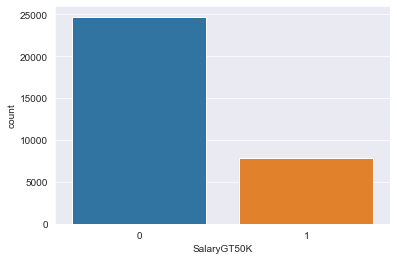

In [8]:
sns.countplot(x='SalaryGT50K',data=SalaryData)

# Visualize distribution of all the Continuous Predictor variables in the data using histograms


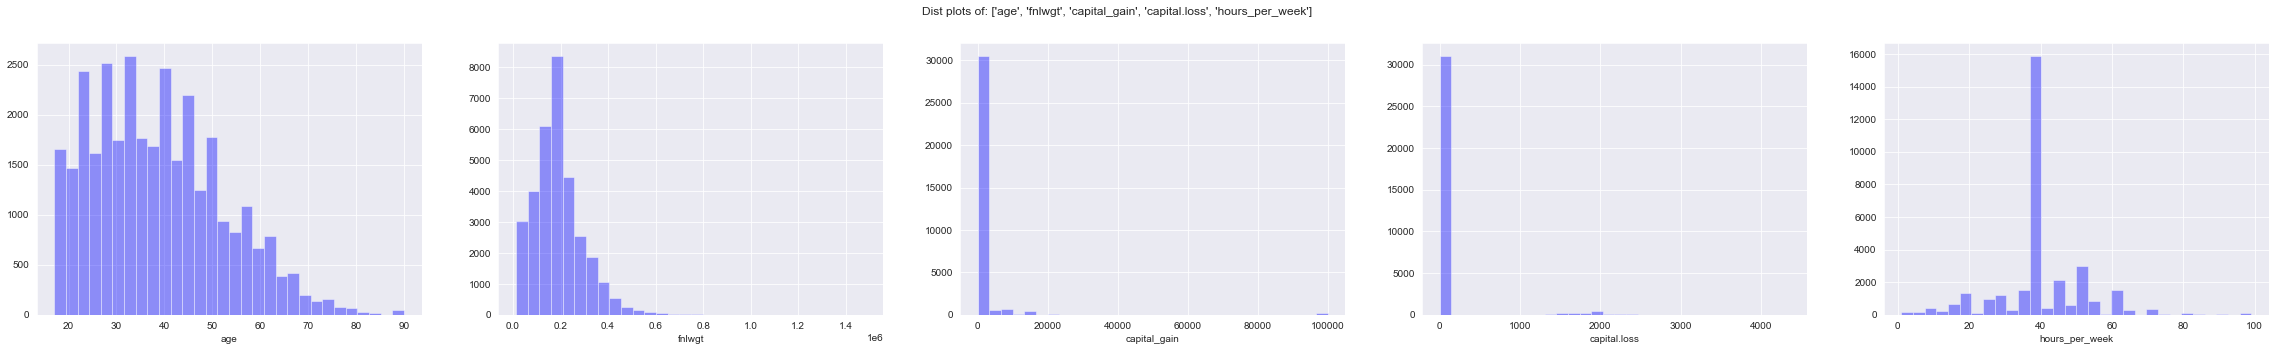

In [9]:
colsToPlot=['age', 'fnlwgt','capital_gain', 'capital.loss', 'hours_per_week']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,5))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=SalaryData[i],ax=subPlot[feature],kde=False,bins=30,color='blue')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.show()

### Data Distribution: Bar Chart for Categorical columns

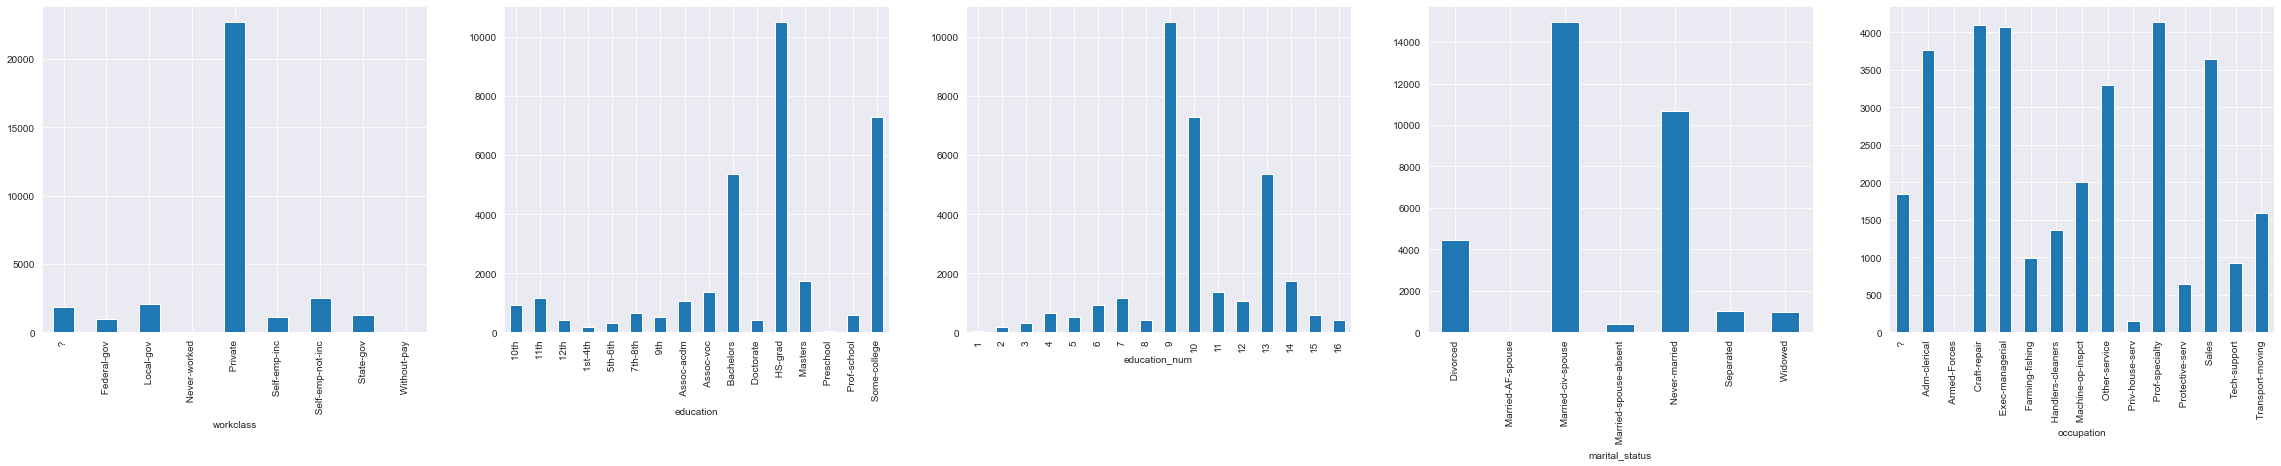

In [10]:
# Grouping by cut to find the aggregated values
%matplotlib inline
    
import matplotlib.pyplot as plt
Catcols=['workclass','education', 'education_num', 'marital_status', 'occupation']

# Printing the aggregated values
fig, subPlot=plt.subplots(nrows=1, ncols=len(Catcols), figsize=(40,6))
for colName, plotNumber in zip(Catcols, range(len(Catcols))):
        SalaryData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

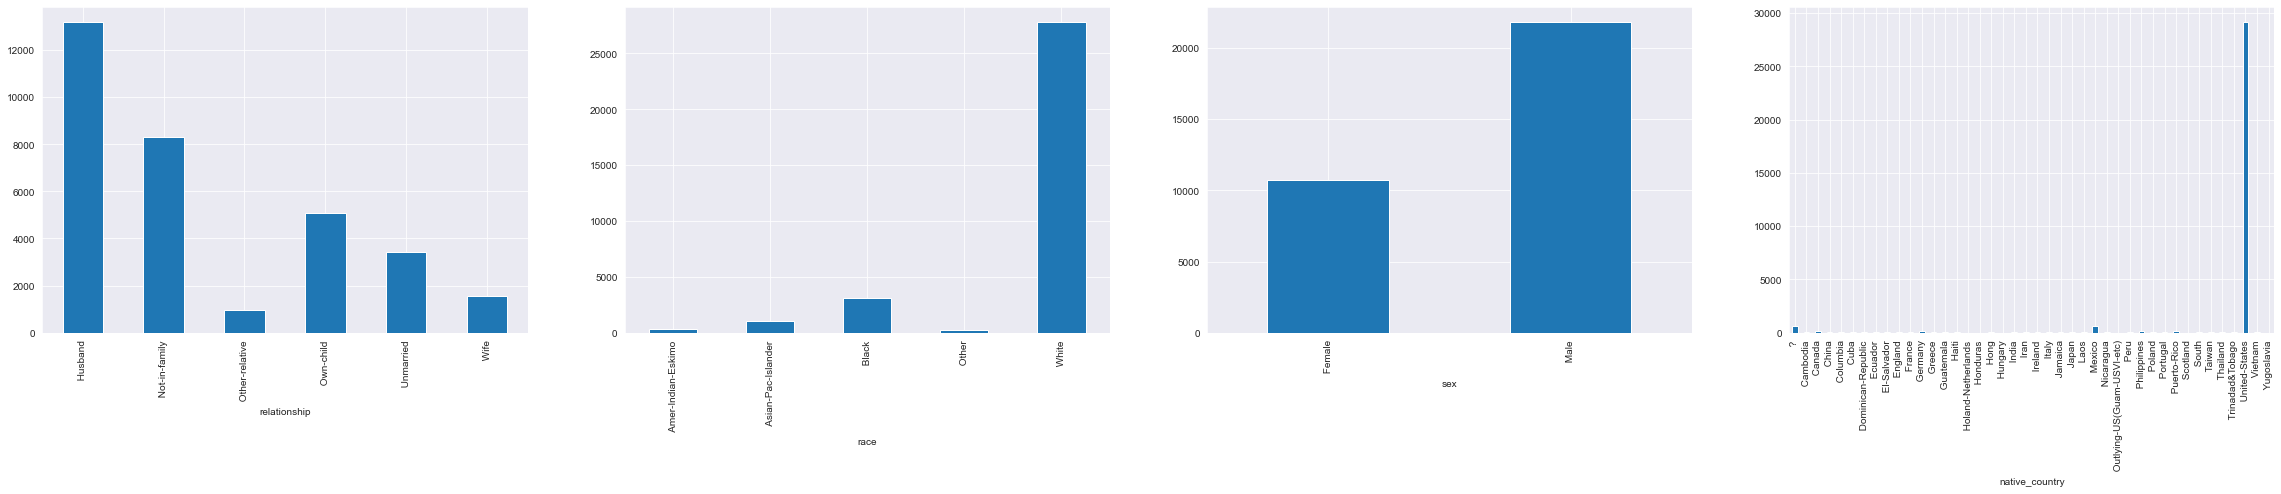

In [11]:
# Grouping by cut to find the aggregated values
%matplotlib inline
    
import matplotlib.pyplot as plt
Catcols=[ 'relationship', 'race', 'sex','native_country']

# Printing the aggregated values
fig, subPlot=plt.subplots(nrows=1, ncols=len(Catcols), figsize=(40,6))
for colName, plotNumber in zip(Catcols, range(len(Catcols))):
        SalaryData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "age", there are around 6000 rows of data that has age between 15 to 45.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

#### Selected Continuous Variables:

'age': Selected. Distribution is good.

'fnlwgt': Selected. Outliers seen beyond 0.6.

'capital_gain': Selected. Outliers seen beyond 40000.

'capital.loss': Selected. Outliers seen beyond 1000.

'hours_per_week': Selected. Distribution is good.


# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

All the categorical variables are selected except 'native_country',because it has too many levels.

Selected Categorical Variables: 
'workclass','education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex'

# Outlier Treatment for 'fnlwgt' column

In [12]:
#Finding the values near 800000
SalaryData['fnlwgt'][SalaryData['fnlwgt']> 0.8*1e6].sort_values(ascending=False)

14449    1484705
18138    1455435
16739    1366120
15569    1268339
8258     1226583
5369     1184622
25075    1161363
29164    1125613
27365    1097453
27682    1085515
9748     1038553
23523    1033222
414      1033222
31792     981628
7934      972354
20488     953588
15044     930948
8485      917220
5423      913447
1597      910398
18874     889965
312       860348
14414     857532
30760     857532
12263     849857
24090     816750
25851     809585
17743     806552
23373     806316
Name: fnlwgt, dtype: int64

In [13]:
# Replacing outliers with nearest possible value
SalaryData['fnlwgt'][SalaryData['fnlwgt']> 0.8*1e6]=806316

# Outlier Treatment for 'capital_gain' column

In [14]:
#Finding the values near 40000
SalaryData['capital_gain'][SalaryData['capital_gain']> 40000].sort_values(ascending=False)

1246     99999
1368     99999
20987    99999
21188    99999
21489    99999
21992    99999
22275    99999
22317    99999
22361    99999
22385    99999
22749    99999
22811    99999
23087    99999
23467    99999
23678    99999
23999    99999
24008    99999
24067    99999
24105    99999
20613    99999
20283    99999
20055    99999
18408    99999
17538    99999
17644    99999
17665    99999
17789    99999
18080    99999
18126    99999
18315    99999
18463    99999
19900    99999
18654    99999
18882    99999
19080    99999
19084    99999
19133    99999
19438    99999
19807    99999
24200    99999
24285    99999
24295    99999
29806    99999
28054    99999
28214    99999
28264    99999
28294    99999
28318    99999
28349    99999
29635    99999
30244    99999
27635    99999
30496    99999
30913    99999
31111    99999
31828    99999
31972    99999
32090    99999
32238    99999
27640    99999
27413    99999
24510    99999
25633    99999
24638    99999
24673    99999
24850    99999
24983    9

In [15]:
# Replacing outliers with nearest possible value
SalaryData['capital_gain'][SalaryData['capital_gain']> 40000]=41310

# Outlier Treatment for 'capital.loss' column

In [16]:
#Finding the values near 1000
SalaryData['capital.loss'][SalaryData['capital.loss']< 1000].sort_values(ascending=False)

11043    974
7032     974
15610    880
32500    880
4424     880
        ... 
10854      0
10853      0
10852      0
10851      0
32560      0
Name: capital.loss, Length: 31078, dtype: int64

In [17]:
# Replacing outliers with nearest possible value
SalaryData['capital.loss'][SalaryData['capital.loss']> 1000]=974

# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

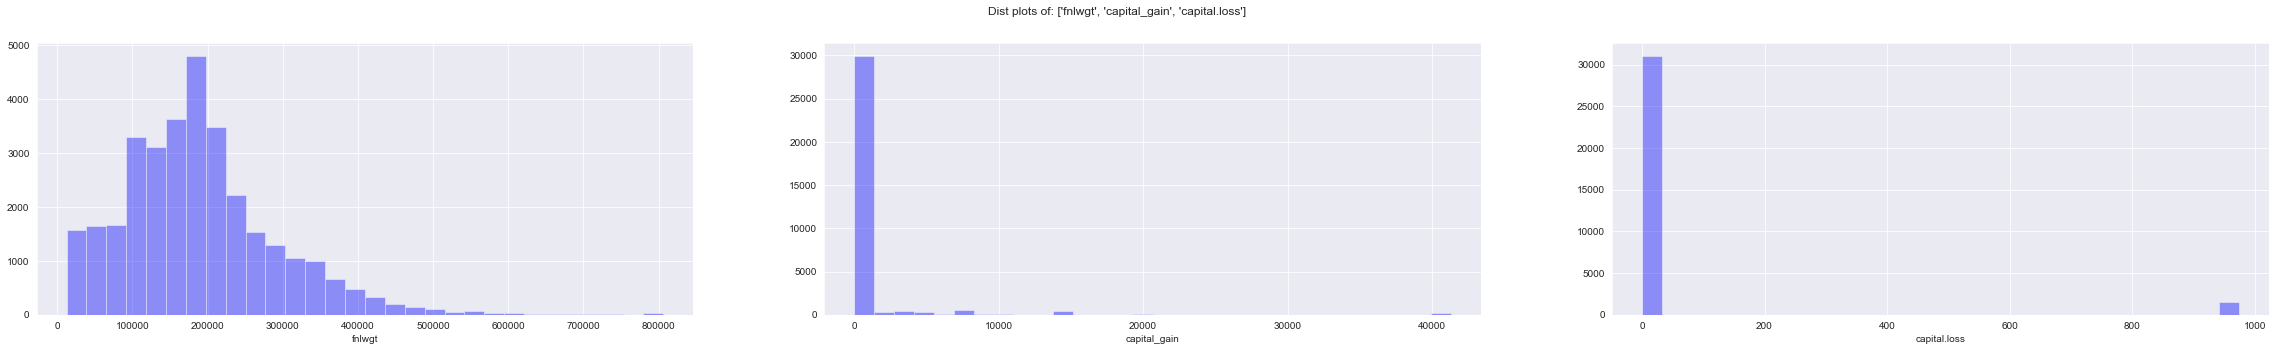

In [18]:
colsToPlot=['fnlwgt','capital_gain', 'capital.loss']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,5))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=SalaryData[i],ax=subPlot[feature],kde=False,bins=30,color='blue')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.show()

# Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots

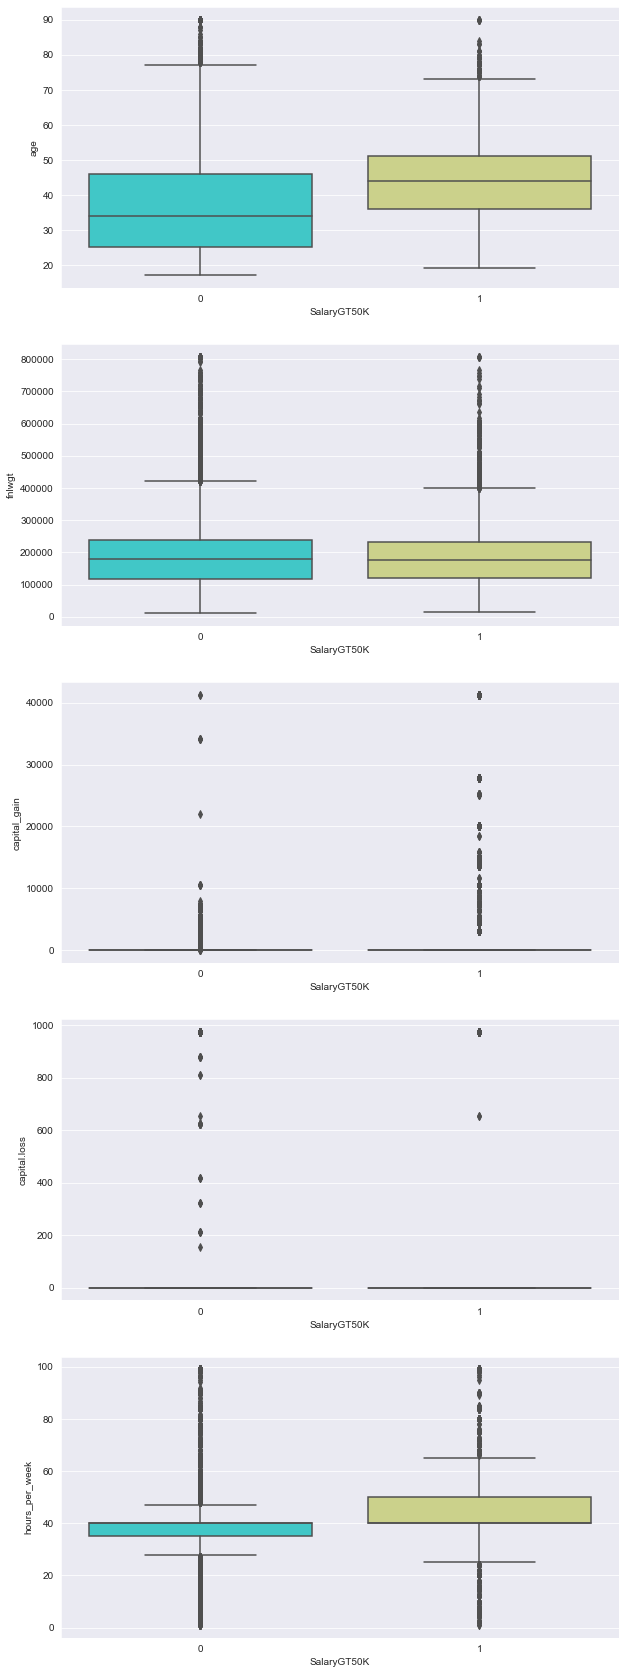

In [19]:
# Box Plot between Categorical and Continuous variable
#Boxes must not be aligned
ContCols=['age', 'fnlwgt','capital_gain', 'capital.loss', 'hours_per_week']
fig, subPlot=plt.subplots(nrows=len(ContCols), ncols=1, figsize=(10,30))
#fig.suptitle('Dist plots of: '+ str(colsToPlot))
for i, feature in zip(ContCols, range(len(ContCols))):
        sns.boxplot(x='SalaryGT50K',y=i,data=SalaryData,ax=subPlot[feature],palette='rainbow')

# Box-Plots interpretation
What should we look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with SalaryGT50K.
For example, look at the first chart "fnlwgt" Vs "SalaryGT50K". The boxes are in the same line! It means that people who have income greater than 50K have no dependency on the final weight given to the population in their area. Hence, I cannot distinguish between approval and rejection based on the fnlwht. So this column is NOT correlated with the SalaryGT50K.

The other three charts exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of salary. It hints that these variables might be correlated with SalaryGT50K.

We confirm this by looking at the results of ANOVA test below

In [20]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [21]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'fnlwgt','capital_gain', 'capital.loss', 'hours_per_week']
FunctionAnova(inpData=SalaryData, TargetVariable='SalaryGT50K', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with SalaryGT50K | P-Value: 0.0
fnlwgt is NOT correlated with SalaryGT50K | P-Value: 0.09328099780329382
capital_gain is correlated with SalaryGT50K | P-Value: 0.0
capital.loss is correlated with SalaryGT50K | P-Value: 2.9353985714024566e-143
hours_per_week is correlated with SalaryGT50K | P-Value: 0.0


['age', 'capital_gain', 'capital.loss', 'hours_per_week']

The results of ANOVA confirm our visual analysis using box plots above.

Final selected Continuous columns:

'age', 'hours_per_week', 'capital_gain', 'capital.loss'

# Categorical Vs Categorical Relationship ---- Grouped Bar Plot/Cross Tabulation

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [22]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=SalaryData['marital_status'], columns=SalaryData['SalaryGT50K'])
CrossTabResult

SalaryGT50K,0,1
marital_status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


<AxesSubplot:xlabel='marital_status'>

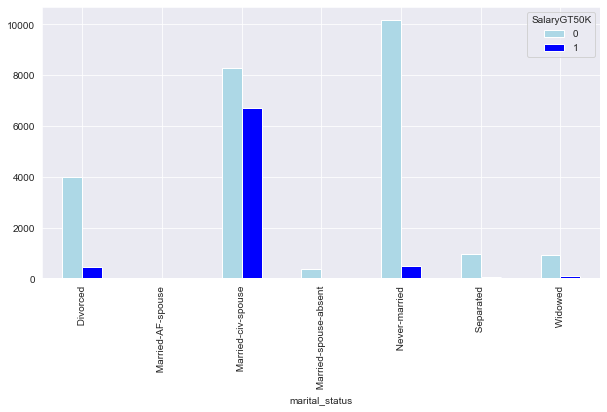

In [23]:
CrossTabResult.plot.bar(figsize=(10,5), color=['lightblue','blue'])

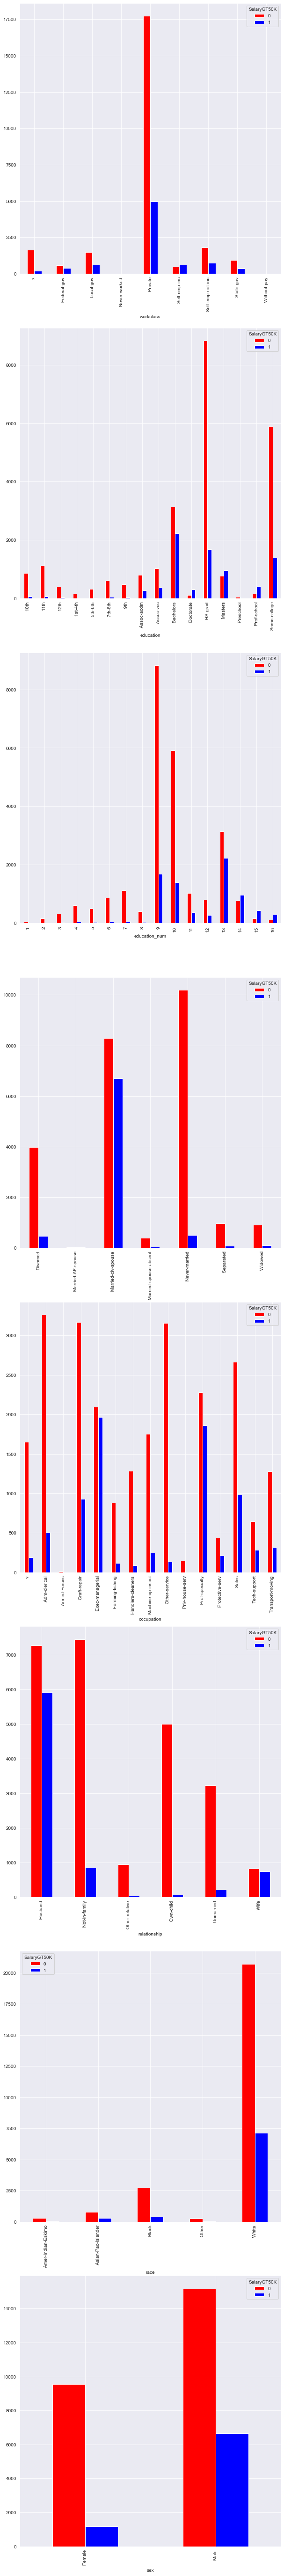

In [24]:
%matplotlib inline
    
import matplotlib.pyplot as plt
CategoricalCol=['workclass','education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

# Printing the aggregated values
fig, subPlot=plt.subplots(nrows=len(CategoricalCol), ncols=1, figsize=(10,100))
for colName, plotNumber in zip(CategoricalCol, range(len(CategoricalCol))):
    CrossTabResult=pd.crosstab(index=SalaryData[colName], columns=SalaryData['SalaryGT50K'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=subPlot[plotNumber])

# Grouped Bar charts Interpretation
What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. 

On the other hand, look at the marital_status vs SalaryGT50K plot. The bars are different for each category, Hence, two columns are correlated with each other.

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [25]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [26]:
CategoricalVariables=['workclass', 'education', 'marital_status','occupation',
                    'relationship', 'race', 'sex']

# Calling the function
FunctionChisq(inpData=SalaryData, 
              TargetVariable='SalaryGT50K',
              CategoricalVariablesList= CategoricalVariables)

workclass is correlated with SalaryGT50K | P-Value: 2.026505431120716e-220
education is correlated with SalaryGT50K | P-Value: 0.0
marital_status is correlated with SalaryGT50K | P-Value: 0.0
occupation is correlated with SalaryGT50K | P-Value: 0.0
relationship is correlated with SalaryGT50K | P-Value: 0.0
race is correlated with SalaryGT50K | P-Value: 2.305960610160958e-70
sex is correlated with SalaryGT50K | P-Value: 0.0


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

*Finally selected Categorical variables:*

**'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex'**

## Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

Instead of original "education" column, I am selecting the "education_num". Which represents the ordinal property of the data.

In [27]:
SelectedColumns=['workclass', 'education_num', 'marital_status', 'occupation', 
                 'relationship', 'race', 'sex','age', 'hours_per_week',
                 'capital_gain', 'capital.loss']

# Selecting final columns
DataForML=SalaryData[SelectedColumns]
DataForML.head()

,workclass,education_num,marital_status,occupation,relationship,race,sex,age,hours_per_week,capital_gain,capital.loss
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,39,40,2174,0
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,13,0,0
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,38,40,0,0
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,53,40,0,0
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,28,40,0,0


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.

## Converting the binary nominal variable to numeric using 1/0 mapping

In [28]:
DataForML['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [29]:
DataForML['sex'].replace({' Male': 0, ' Female': 1},inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [30]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['SalaryGT50K']=SalaryData['SalaryGT50K']

# Printing sample rows
DataForML_Numeric.head()

,education_num,sex,age,hours_per_week,capital_gain,capital.loss,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,SalaryGT50K
0,13,0,39,40,2174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13,0,50,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,0,38,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,53,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,13,1,28,40,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [109]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['education_num', 'sex', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       '

In [32]:
# Separate Target Variable and Predictor Variables
TargetVariable='SalaryGT50K'
Predictors=['education_num', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Standardization/Normalization of data

In [111]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22792, 48)
(22792,)
(9769, 48)
(9769,)


## Random Forest

RandomForestClassifier(criterion='entropy', max_depth=5)
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      7455
           1       0.83      0.42      0.56      2314

    accuracy                           0.84      9769
   macro avg       0.84      0.70      0.73      9769
weighted avg       0.84      0.84      0.82      9769

[[7258  197]
 [1334  980]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.81987791 0.8201629  0.82890211 0.82092192 0.82452495 0.82522605
 0.81346037 0.83302037 0.83343478 0.8139317 ]

Final Average Accuracy of the model: 0.82


<AxesSubplot:>

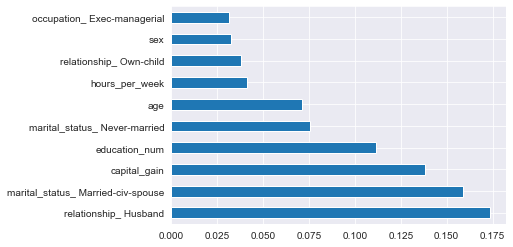

In [115]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=5, n_estimators=100,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Plotting one of the Decision Trees in Random Forest

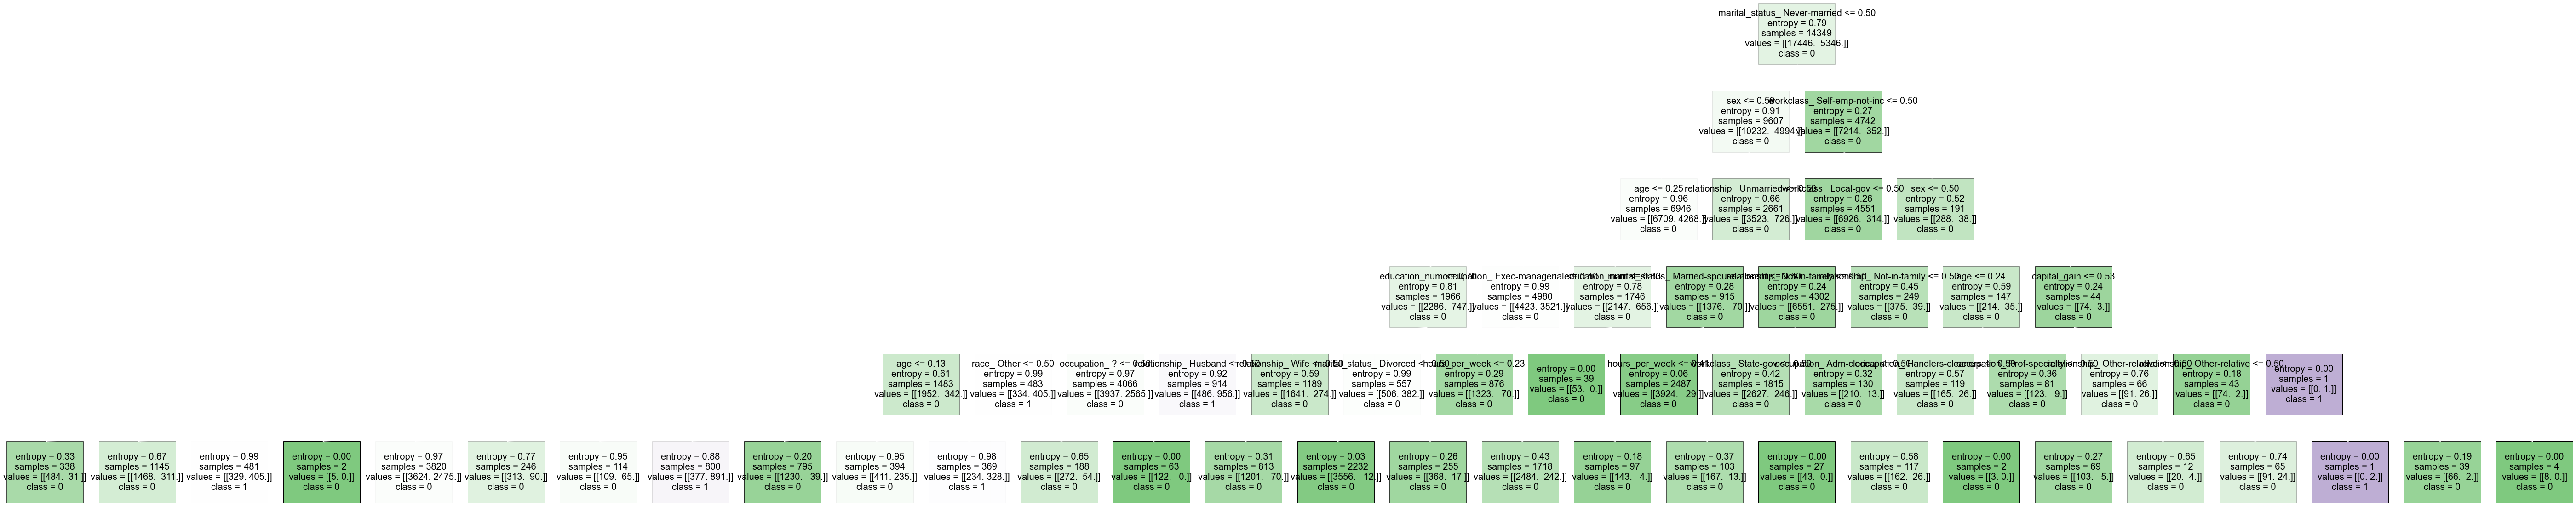

In [119]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=['0','1'])
#dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(100,20)

## AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100)
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7455
           1       0.79      0.51      0.62      2314

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769

[[7140  315]
 [1123 1191]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.83171322 0.83652399 0.84333091 0.82887208 0.84066987 0.84095072
 0.83566177 0.84685244 0.84520715 0.83836558]

Final Average Accuracy of the model: 0.84


<AxesSubplot:>

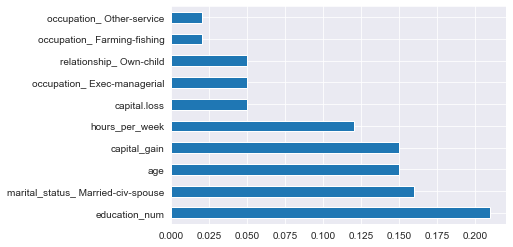

In [120]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Plotting one of the Decision trees from Adaboost

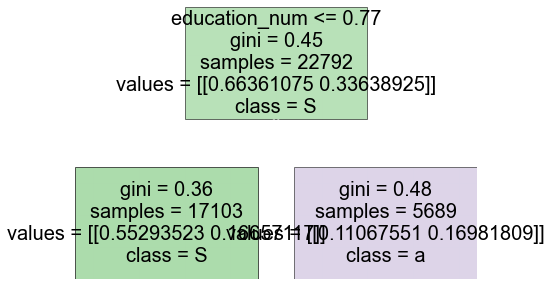

In [121]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## Hyper Parameter Optimization for XG Boost using RandomizedCV

In [127]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [129]:
!pip install xgboost

In [132]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost 
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [133]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [135]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 47.1 seconds.


In [136]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [137]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

## XG Boost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.0,
              gpu_id=-1, importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method='exact',
              validate_parameters=1, verbosity=None)
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.76      0.65      0.70      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.86      0.87      0.8

<AxesSubplot:>

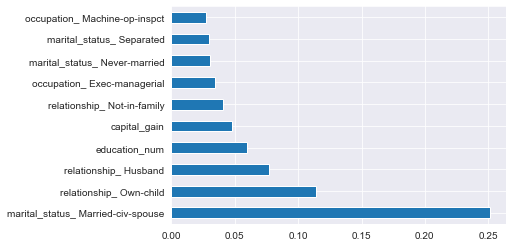

In [145]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
#clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')
clf=xgboost.XGBClassifier(objective='binary:logistic',base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None,learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=7,n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, tree_method='exact', validate_parameters=1,
              verbosity=None,eval_metric='mlogloss')
# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train,eval_metric='logloss')
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Plotting a single Decision tree out of XGBoost

In [146]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Sreya Basak\\anaconda3\\Library\\bin\\graphviz'

<AxesSubplot:>

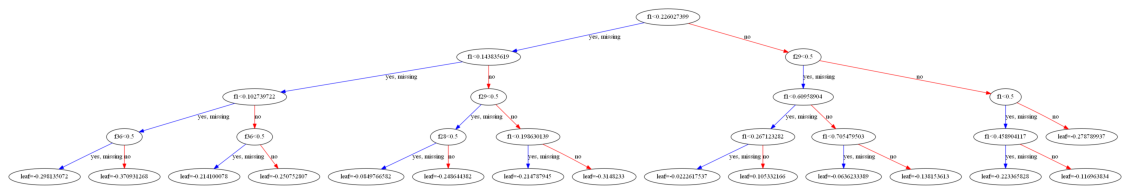

In [147]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

XGB: 0.865567 (0.004318)
RF: 0.841392 (0.006425)
ADA: 0.849290 (0.006788)


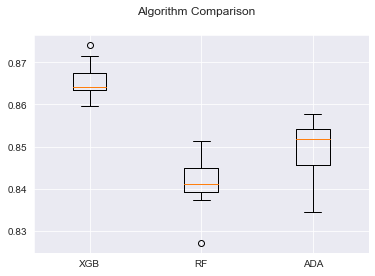

In [151]:
seed=7
from sklearn import model_selection
models = []
models.append(('XGB', xgboost.XGBClassifier(objective='binary:logistic',base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None,learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=7,n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, tree_method='exact', validate_parameters=1,
              verbosity=None,eval_metric='mlogloss')))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=100,criterion='entropy')
))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.1)
))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Out of the three algorithms, **XGBoost** gave the highest accuracy.

## CAT Boost

Catboost achieves better results when you work with datasets where categorical features play a large role. CatBoost is an open-sourced machine learning algorithm from Yandex. It works with diverse data-types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.

**Advantages of CatBoost Library**

* Performance- CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.
* Handling Categorical features automatically- We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features.
* Robust- It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. 

Important Parameters:

* cat_features: This parameter is a must in order to leverage Catboost preprocessing of categorical features, if you encode the categorical features yourself and don’t pass the columns indices as 'cat_features' you are missing the essence of Catboost. This parameter takes in the indices of Categorical Columns
* one_hot_max_size: As mentioned before, Catboost uses one-hot encoding for all features with at most 'one_hot_max_size' unique values. In our case, the categorical features have at most 5 unique values, so we will set one_hot_max_size as 5
* learning_rate & n_estimators: Smaller learning_rate and higher n_estimators are needed to utilize the model. Usually, the approach is to start with a relative high learning_rate, tune other parameters and then decrease the learning_rate while increasing n_estimators
* depth: Depth of the base trees, this parameter has an high impact on training time.
* l2_leaf_reg: L2 regularization coefficient
* random_strength: Every split gets a score and random_strength is adding some randomness to the score, it helps to reduce overfitting.
* use_best_model: if set to True, this parameter will make the model prevent overfitting
* loss_function: For 2-class classification use 'LogLoss'. For Multiclass use 'MultiClass'
* border_count: The number of splits for numerical features. Allowed values are integers from 1 to 255 inclusively.



In [153]:
!pip install catboost

In [49]:
!pip install hyperopt

In [36]:
#get the train and test data
train_df = SalaryData
test_df = SalaryData['SalaryGT50K']

In [37]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [38]:
x = train_df.drop('SalaryGT50K',axis=1)
y = train_df.SalaryGT50K

### Below step is really important, as it's mandatory in CatBoost to pass the indexes of all the categorical columns in our dataset

In [41]:
#choose the features we want to train, just forget the float data
cate_features_index = np.where(x.dtypes == object)[0]
cate_features_index

array([ 1,  3,  5,  6,  7,  8,  9, 13], dtype=int64)

In [42]:
#make the x for train and test (also called validation data) 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.75,random_state=1234)

In [54]:
# Initialising Base CatBoost Model
from catboost import Pool, CatBoostClassifier, cv
# 1. Base Model
cb = catboost.CatBoostClassifier(loss_function='Logloss',
                         eval_metric='Logloss',
                         boosting_type='Ordered', # use permutations
                         random_seed=2405, 
                         use_best_model=True,
                         one_hot_max_size = 6,
                         silent=True)



# 2. Fitting the Model
cb.fit(X_train,y_train,cat_features=cate_features_index, eval_set=(X_test, y_test))

# 3. Initial Prediction of Results
y_pred = cb.predict(X_test)

# 4. Predicting Probabilites
y_pred_proba = cb.predict_proba(X_test)

from sklearn.metrics import classification_report,confusion_matrix
# 5. Printing Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7348
           1       0.77      0.63      0.69      2421

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



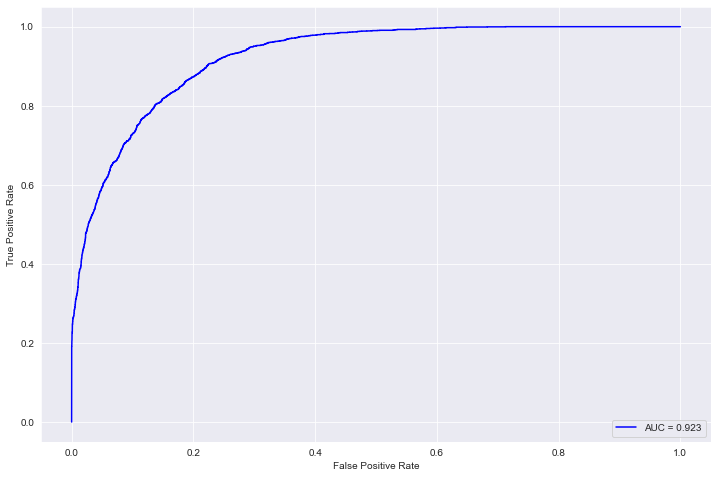

In [55]:
# Printing ROC-AUC score
from sklearn import metrics
metrics.roc_auc_score(y_test,y_pred_proba[:,1])

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()